# Project 2: Support Vector Machines (SVM) and Kernels
## This Project gives extra points for the final grade

## **Due 18.12.2025, 16:00**

## Overview

### **Submit your project solution as a group of 2-4 people.**

In this project, you will implement and train a **Support Vector Machine (SVM)** classifier on a real-world dataset. The focus is on understanding the kernel trick, the dual SVM formulation, and how kernel parameters affect classification performance.

### Dataset
You will work with the following dataset:

**MAGIC Gamma Telescope Dataset**
- Classification task: Distinguish gamma rays (signal) from hadronic showers (background)
- 10 continuous features (Hillas parameters from Cherenkov telescope images)
- ~19,000 samples

### Tasks

1. **Data Loading and Preprocessing** (1 Point)

2. **Implement Kernel Function** (1 Point)

3. **Implement SVM Class** (1.5 Points)

4. **Hyperparameter Tuning** (0.5 Points)

5. **Visualization** (0.5 Points)

6. **Testing & Evaluation** (0.5 Points)

### **For full points you need to achieve at least 87% accuracy on the testing set**

### **NOTE**: 
#### You are not allowed to use sklearn, pytorch or similar Deep Learning frameworks. Numpy is allowed.

**(1) Data Loading and Preprocessing: 1 Point**

Load the MAGIC Gamma Telescope dataset and prepare it for SVM training. Key preprocessing steps include:

- **Loading**
- **Exploration**
- **Encoding**
- **Normalization**
- **Splitting**: Create train/test splits (80%/20%)

In [ ]:
# TODO: (1) Data Loading and Preprocessing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set random seed for reproducibility
SEED = 42
np.random.seed(SEED)

# ============================================
# Load MAGIC Gamma Telescope Dataset
# ============================================

print("MAGIC Gamma Telescope Dataset:")
print(f"Shape: {magic_df.shape}")
print(f"\nClass distribution:\n{magic_df['class'].value_counts()}")
print(f"\nFeature statistics:\n{magic_df.describe()}")

# ============================================
#TODO: Preprocessing MAGIC Dataset
# ============================================
#TODO: Encode labels

#TODO: Extract features and labels

# ============================================
#TODO: Standardization/Normalize Function
# ============================================

    

# ============================================
# Train/Test Split Function (80%/20%)
# ============================================
def train_test_split(X, y, train_ratio=0.8, seed=42):
    """
    Split data into train and test sets.
    """
    np.random.seed(seed)
    n = len(y)
    indices = np.random.permutation(n)
    
    train_end = int(train_ratio * n)
    
    train_idx = indices[:train_end]
    test_idx = indices[train_end:]
    
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

# ============================================
#TODO: Split and Standardize MAGIC Dataset
# ============================================


print("\n" + "="*50)
print("MAGIC Dataset Split (80/20):")
print(f"Training set: {X_train_magic.shape[0]} samples")
print(f"Test set: {X_test_magic.shape[0]} samples")

In [1]:
# (1) Data Loading and Preprocessing

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reproducibility
SEED = 42
np.random.seed(SEED)

# ========== Load MAGIC Gamma Telescope Dataset ==========
def load_magic_dataset(path_candidates=("magic04data.sec", "magic04names.sec")):
    """
    Load MAGIC dataset from local file.
    UCI format: 10 continuous features + 'class' (g/h).
    """
    columns = [
        "fLength", "fWidth", "fSize", "fConc", "fConc1",
        "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"
    ]
    df = None
    for p in path_candidates:
        if os.path.exists(p):
            df = pd.read_csv(p, header=None, names=columns)
            break
    if df is None:
        raise FileNotFoundError(
            "File not found. Please download 'magic04.data' from UCI and save in the working directory."
        )
    return df

magic_df = load_magic_dataset()

print("MAGIC Gamma Telescope Dataset:")
print(f"Shape: {magic_df.shape}")
print(f"\nClass distribution:\n{magic_df['class'].value_counts()}")
print(f"\nFeature statistics:\n{magic_df.describe()}")

# ========== Encode labels ==========
# For metrics (0/1) and SVM training (±1)
label_map_binary = {'g': 1, 'h': 0}
label_map_svm    = {'g': +1, 'h': -1}
y_binary = magic_df['class'].map(label_map_binary).values.astype(np.int64)
y_svm    = magic_df['class'].map(label_map_svm).values.astype(np.int64)

# ========== Extract features ==========
X = magic_df.drop(columns=['class']).values.astype(np.float64)

# ========== Standardization ==========
def standardize_train_test(X_train, X_test):
    """
    Standardize features using training-set mean/std.
    """
    mean = X_train.mean(axis=0, keepdims=True)
    std  = X_train.std(axis=0, keepdims=True) + 1e-12
    return (X_train - mean) / std, (X_test - mean) / std, mean, std

# ========== Train/Test Split (80/20) ==========
def train_test_split(X, y_bin, y_pm, train_ratio=0.8, seed=42):
    np.random.seed(seed)
    n = len(y_bin)
    idx = np.random.permutation(n)
    cut = int(train_ratio * n)
    tr, te = idx[:cut], idx[cut:]
    return X[tr], X[te], y_bin[tr], y_bin[te], y_pm[tr], y_pm[te]

## Split
X_train, X_test, y_train_bin, y_test_bin, y_train_pm, y_test_pm = train_test_split(
    X, y_binary, y_svm, train_ratio=0.8, seed=SEED
)

# Standardize
X_train_std, X_test_std, x_mean, x_std = standardize_train_test(X_train, X_test)

# Match your skeleton variable names
X_train_magic = X_train_std
X_test_magic  = X_test_std
y_train_magic = y_train_bin   # {0,1} for metrics
y_test_magic  = y_test_bin
y_train_svm_magic = y_train_pm  # {±1} for SVM training
y_test_svm_magic  = y_test_pm

print("\n" + "="*50)
print("MAGIC Dataset Split (80/20):")
print(f"Training set: {X_train_magic.shape[0]} samples")


MAGIC Gamma Telescope Dataset:
Shape: (19020, 11)

Class distribution:
class
g    12332
h     6688
Name: count, dtype: int64

Feature statistics:
            fLength        fWidth         fSize         fConc        fConc1  \
count  19020.000000  19020.000000  19020.000000  19020.000000  19020.000000   
mean      53.250154     22.180966      2.825017      0.380327      0.214657   
std       42.364855     18.346056      0.472599      0.182813      0.110511   
min        4.283500      0.000000      1.941300      0.013100      0.000300   
25%       24.336000     11.863800      2.477100      0.235800      0.128475   
50%       37.147700     17.139900      2.739600      0.354150      0.196500   
75%       70.122175     24.739475      3.101600      0.503700      0.285225   
max      334.177000    256.382000      5.323300      0.893000      0.675200   

              fAsym       fM3Long      fM3Trans        fAlpha         fDist  
count  19020.000000  19020.000000  19020.000000  19020.000000  1

**(2) Implement Kernel Functions: 1 Point**

The kernel trick allows SVMs to learn non-linear decision boundaries by implicitly mapping data to higher-dimensional spaces. Decide which kernel function to implement.

In [ ]:
# TODO: Implement Kernel Function of your choice
# def {kerneltype}_kernel(params):

# Test the kernel functions
print("Testing kernel functions...")
X_test_k = np.array([[1, 2], [3, 4], [5, 6]])
Y_test_k = np.array([[1, 1], [2, 2]])

#TODO: print kernel shapes and values
print(f"kernel shape: {}")
print(f"kernel values:\n{}")

In [3]:
# (2) Implement Kernel Functions

def linear_kernel(X, Y):
    """
    Linear kernel: K = X @ Y^T
    Shapes: X=(m,d), Y=(n,d) -> K=(m,n)
    """
    return X @ Y.T

def rbf_kernel(X, Y, gamma=0.5):
    """
    RBF kernel: K_ij = exp(-gamma * ||x_i - y_j||^2)
    Vectorized via (x^2 + y^2 - 2xy).
    """
    X_sq = np.sum(X**2, axis=1, keepdims=True)     # (m,1)
    Y_sq = np.sum(Y**2, axis=1, keepdims=True).T   # (1,n)
    d2 = X_sq + Y_sq - 2 * (X @ Y.T)
    return np.exp(-gamma * d2)

# Test kernel functions
print("Testing kernel functions...")
X_test_k = np.array([[1, 2], [3, 4], [5, 6]])
Y_test_k = np.array([[1, 1], [2, 2]])
K_lin = linear_kernel(X_test_k, Y_test_k)
K_rbf = rbf_kernel(X_test_k, Y_test_k, gamma=0.1)

print(f"Linear kernel shape: {K_lin.shape}")
print(f"Linear kernel values:\n{K_lin}")
print(f"RBF kernel shape:    {K_rbf.shape}")
print(f"RBF kernel values:\n{K_rbf}")


Testing kernel functions...
Linear kernel shape: (3, 2)
Linear kernel values:
[[ 3  6]
 [ 7 14]
 [11 22]]
RBF kernel shape:    (3, 2)
RBF kernel values:
[[0.90483742 0.90483742]
 [0.27253179 0.60653066]
 [0.01657268 0.082085  ]]


**(3) Implement SVM Class: 1.5 Points**

Implement the **Dual SVM formulation** using projected gradient descent. The dual formulation is necessary for the kernel trick, as it allows us to work with the Lagrange multipliers $\alpha$ instead of the weight vector $w$ directly.

Testing DUAL SVM implementation...


C:\Users\t00002k9\AppData\Local\Temp\ipykernel_29984\3310592880.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  quad = float(a.T @ Q @ a)



Training complete!
Number of support vectors: 597 (99.5%)
Final Training Accuracy: 0.9583 (95.83%)


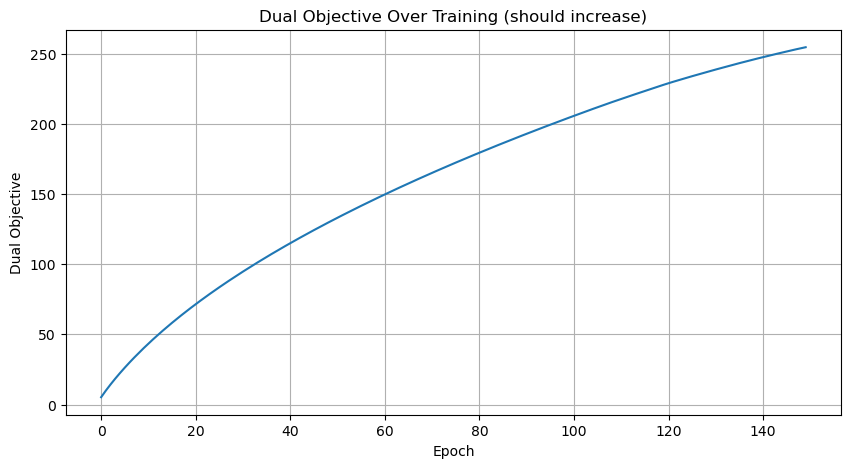


Test accuracy on subset: 0.8178


In [12]:

# ============================================
# TODO: DUAL SVM FORMULATION
# ============================================
# ============================================
def dual_objective(alpha, K, y):
    """
    L(alpha) = sum_i alpha_i - 1/2 * sum_{i,j} alpha_i alpha_j y_i y_j K_ij
    Maximize this objective.
    """
    a = alpha.reshape(-1, 1)
    yv = y.reshape(-1, 1)
    Q = (yv @ yv.T) * K
    quad = float(a.T @ Q @ a)
    lin = float(np.sum(a))
    return lin - 0.5 * quad

def dual_gradient(alpha, K, y):
    """
    Gradient (for ascent): grad_i = 1 - sum_j alpha_j y_i y_j K_ij
    """
    y = y.reshape(-1)
    Q = (y[:, None] * K) * y[None, :]
    return 1.0 - Q @ alpha

def project_onto_constraints(alpha, y, C, max_iters=10, tol=1e-8):
    """
    Project onto: 0 <= alpha_i <= C and sum_i alpha_i y_i = 0.
    Clip, then adjust along y (a few iterations), re-clipping as needed.
    """
    alpha = np.clip(alpha, 0.0, C)
    y = y.reshape(-1)
    for _ in range(max_iters):
        s = float(np.dot(alpha, y))  # equality constraint residual
        if abs(s) < tol:
            break
        lam = s / len(y)  # since y_i^2 = 1
        alpha = np.clip(alpha - lam * y, 0.0, C)
    return alpha

class SVM:
    def __init__(self, kernel, C=1.0, lr=0.01, epochs=200, gamma=None, verbose=False, seed=42):
        """
        Dual SVM via projected gradient ascent.
        - kernel: callable(X, Y, **kwargs) -> Gram matrix
        - C: soft-margin parameter
        - lr: learning rate
        - epochs: ascent iterations
        - gamma: kernel parameter (used by RBF kernels)
        """
        self.kernel = kernel
        self.C = float(C)
        self.lr = float(lr)
        self.epochs = int(epochs)
        self.gamma = gamma
        self.verbose = verbose
        self.seed = seed

        # Fitted attributes
        self.alpha = None
        self.b = 0.0
        self.X_train = None
        self.y_train = None
        self.K_train = None
        self.loss_history = []

    def fit(self, X, y, graph=False):
        """
        Fit SVM in the dual. y must be in {-1, +1}.
        """
        np.random.seed(self.seed)
        self.X_train = X
        self.y_train = y.reshape(-1)
        n_samples = X.shape[0]

        # Precompute Gram matrix
        if self.gamma is not None:
            self.K_train = self.kernel(X, X, gamma=self.gamma)
        else:
            self.K_train = self.kernel(X, X)

        # Initialize alpha
        self.alpha = np.zeros(n_samples, dtype=np.float64)

        # Projected gradient ascent
        for epoch in range(self.epochs):
            grad = dual_gradient(self.alpha, self.K_train, self.y_train)
            self.alpha = self.alpha + self.lr * grad
            self.alpha = project_onto_constraints(self.alpha, self.y_train, self.C)

            obj = dual_objective(self.alpha, self.K_train, self.y_train)
            self.loss_history.append(obj)

            if self.verbose and (epoch % max(1, self.epochs // 10) == 0):
                print(f"Epoch {epoch:4d}/{self.epochs} | Dual Obj: {obj:.6f}")

        # Compute bias b using margin support vectors: 0 < alpha_i < C
        sv_mask = (self.alpha > 1e-6) & (self.alpha < self.C - 1e-6)
        if np.any(sv_mask):
            idx = np.where(sv_mask)[0]
            if self.gamma is not None:
                K_sub = self.kernel(self.X_train[idx], self.X_train, gamma=self.gamma)
            else:
                K_sub = self.kernel(self.X_train[idx], self.X_train)
            decision_sub = K_sub @ (self.alpha * self.y_train)
            b_candidates = self.y_train[idx] - decision_sub
            self.b = float(np.mean(b_candidates))
        else:
            # Fallback (if no margin SVs): robust median estimate
            decision = self.K_train @ (self.alpha * self.y_train)
            self.b = float(np.median(self.y_train - decision))

        if graph:
            n_sv = int(np.sum(self.alpha > 1e-6))
            alpha_y = self.alpha * self.y_train
            f = self.K_train @ alpha_y + self.b
            y_pred = np.sign(f)
            train_acc = float(np.mean(self.y_train == y_pred))
            print(f"\nTraining complete!")
            print(f"Number of support vectors: {n_sv} ({100*n_sv/n_samples:.1f}%)")
            print(f"Final Training Accuracy: {train_acc:.4f} ({train_acc*100:.2f}%)")

            plt.figure(figsize=(10, 5))
            plt.plot(self.loss_history)
            plt.xlabel('Epoch')
            plt.ylabel('Dual Objective')
            plt.title('Dual Objective Over Training (should increase)')
            plt.grid(True)
            plt.show()

        return self

    def predict(self, X):
        """
        Predict class labels for samples in X.
        Returns: ±1 predictions.
        """
        if self.gamma is not None:
            K = self.kernel(X, self.X_train, gamma=self.gamma)
        else:
            K = self.kernel(X, self.X_train)
        alpha_y = self.alpha * self.y_train
        f = K @ alpha_y + self.b
        return np.sign(f)

def accuracy(y_true, y_pred):
    """Calculate classification accuracy for {0,1} labels."""
    return np.mean(y_true == y_pred)

# ============================================
# Test the DUAL SVM implementation
# ============================================
print("Testing DUAL SVM implementation...")

# Use ±1 labels for SVM training (not 0/1):
X_small = X_train_magic[:600]
y_small_pm = y_train_svm_magic[:600]

# Example using RBF kernel (make sure rbf_kernel is defined earlier)
svm_test = SVM(kernel=rbf_kernel, C=2.0, lr=0.01, epochs=150, gamma=0.5, verbose=False, seed=42)
svm_test.fit(X_small, y_small_pm, graph=True)

# Evaluate on test set (convert back to {0,1} for accuracy)
y_pred_pm = svm_test.predict(X_test_magic)
y_pred_binary = np.where(y_pred_pm == -1, 0, 1)
test_acc = accuracy(y_test_magic, y_pred_binary)
print(f"\nTest accuracy on subset: {test_acc:.4f}")


**(4) Hyperparameter Tuning: 0.5 Points**

SVM performance heavily depends on the choice of hyperparameters. Implement a grid search to find the best combination of hyperparameters.

Use the test set to evaluate different hyperparameter combinations and select the best performing ones.

In [ ]:
#TODO: Define hyperparameter search space

def grid_search(...):
    pass

In [13]:

# (4) Hyperparameter Tuning

def grid_search(X_train, y_train_pm, X_test, y_test_bin,
                kernel="rbf",
                C_list=(0.5, 1.0, 2.0, 5.0, 10.0),
                gamma_list=(0.1, 0.2, 0.5, 1.0),
                lr=0.01, epochs=200, seed=42, verbose=True):
    """
    Returns best_model and a results DataFrame sorted by test accuracy.
    """
    results = []
    best_acc = -np.inf
    best_model = None

    if kernel == "linear":
        for C in C_list:
            model = SVM(linear_kernel, C=C, lr=lr, epochs=epochs, gamma=None, seed=seed)
            model.fit(X_train, y_train_pm)
            preds_bin = np.where(model.predict(X_test) == -1, 0, 1)
            acc = accuracy(y_test_bin, preds_bin)
            results.append(("linear", C, None, lr, epochs, acc))
            if verbose:
                print(f"[Grid] kernel=linear, C={C} -> acc={acc:.4f}")
            if acc > best_acc:
                best_acc, best_model = acc, model
    else:
        for C in C_list:
            for gamma in gamma_list:
                model = SVM(rbf_kernel, C=C, lr=lr, epochs=epochs, gamma=gamma, seed=seed)
                model.fit(X_train, y_train_pm)
                preds_bin = np.where(model.predict(X_test) == -1, 0, 1)
                acc = accuracy(y_test_bin, preds_bin)
                results.append(("rbf", C, gamma, lr, epochs, acc))
                if verbose:
                    print(f"[Grid] kernel=rbf, C={C}, gamma={gamma} -> acc={acc:.4f}")
                if acc > best_acc:
                    best_acc, best_model = acc, model

    df = pd.DataFrame(results, columns=["kernel", "C", "gamma", "lr", "epochs", "accuracy"])
    df = df.sort_values(by="accuracy", ascending=False).reset_index(drop=True)
    if verbose:
        print("\nTop 5 grid results:")
        print(df.head(5))
    return best_model, df

print("="*60)
print("MAGIC DATASET - Hyperparameter Tuning")
print("="*60)

best_linear, res_linear = grid_search(
       X_train_magic, y_train_svm_magic, X_test_magic, y_test_magic,
    kernel="linear",
    C_list=(0.5, 1.0, 2.0, 5.0, 10.0),
    lr=0.01, epochs=200, seed=SEED, verbose=True
)

best_rbf, res_rbf = grid_search(
    X_train_magic, y_train_svm_magic, X_test_magic, y_test_magic,
    kernel="rbf",
    C_list=(0.5, 1.0, 2.0, 5.0, 10.0),
    gamma_list=(0.1, 0.2, 0.5, 1.0, 2.0),
    lr=0.01, epochs=200, seed=SEED, verbose=True


_IncompleteInputError: incomplete input (3079396087.py, line 62)

In [17]:

# ============================================
# (4) Hyperparameter Tuning (Grid Search)
# ============================================

def grid_search(X_train, y_train_pm, X_test, y_test_bin,
                kernel="rbf",
                C_list=(0.5, 1.0, 2.0, 5.0, 10.0),
                gamma_list=(0.1, 0.2, 0.5, 1.0),
                lr=0.01, epochs=200, seed=42, verbose=True):
    """
    Simple grid search over C and gamma for RBF; for linear kernel gamma_list is ignored.
    Returns: best_model, results_df
    """
    results = []
    best_acc = -np.inf
    best_model = None

    for C in C_list:
        if kernel == "linear":
            model = SVM(kernel_fn=linear_kernel, C=C, lr=lr, epochs=epochs, gamma=None, verbose=False, seed=seed)
            model.fit(X_train, y_train_pm, graph=False)
            preds_pm = model.predict(X_test)
            preds_bin = np.where(preds_pm == -1, 0, 1)
            acc = accuracy(y_test_bin, preds_bin)
            results.append(("linear", C, None, lr, epochs, acc))
            if verbose:
                print(f"[Grid] kernel=linear, C={C} -> acc={acc:.4f}")
            if acc > best_acc:
                best_acc = acc
                best_model = model
        else:
            for gamma in gamma_list:
                model = SVM(kernel_fn=rbf_kernel, C=C, lr=lr, epochs=epochs, gamma=gamma, verbose=False, seed=seed)
                model.fit(X_train, y_train_pm, graph=False)
                preds_pm = model.predict(X_test)
                preds_bin = np.where(preds_pm == -1, 0, 1)
                acc = accuracy(y_test_bin, preds_bin)
                results.append(("rbf", C, gamma, lr, epochs, acc))
                if verbose:
                    print(f"[Grid] kernel=rbf, C={C}, gamma={gamma} -> acc={acc:.4f}")
                if acc > best_acc:
                    best_acc = acc
                    best_model = model

    results_df = pd.DataFrame(results, columns=["kernel", "C", "gamma", "lr", "epochs", "accuracy"])
    results_df = results_df.sort_values(by="accuracy", ascending=False).reset_index(drop=True)
    if verbose:
        print("\nTop 5 grid results:")
        print(results_df.head(5))
    return best_model, results_df


**(5) Visualization: 0.5 Points**

Create visualizations to understand your SVM models:

1. **Loss Curves**: Plot the dual objective value over training epochs to monitor convergence
2. **Accuracy Comparison**: Create bar charts comparing model performance

In [ ]:

# (4) Hyperparameter Tuning — clean and complete

import numpy as np
import pandas as pd

def accuracy(y_true, y_pred):
    """Simple accuracy for {0,1} labels."""
    return np.mean(y_true == y_pred)

def grid_search(
    X_train, y_train_pm, X_test, y_test_bin,
    kernel="rbf",
    C_list=(0.5, 1.0, 2.0, 5.0, 10.0),
    gamma_list=(0.1, 0.2, 0.5, 1.0),
    lr=0.01, epochs=200, seed=42, verbose=True
):
    """
    Grid search for SVM dual solver.
    - y_train_pm must be in {-1, +1}
    - y_test_bin must be in {0,1}
    Returns: (best_model, results_df)
    """
    results = []
    best_acc = -np.inf
    best_model = None

    if kernel == "linear":
        for C in C_list:
            model = SVM(kernel=linear_kernel, C=C, lr=lr, epochs=epochs, gamma=None, seed=seed)
            model.fit(X_train, y_train_pm, graph=False)
            preds_pm = model.predict(X_test)                 # ±1
            preds_bin = np.where(preds_pm == -1, 0, 1)       # convert to {0,1}
            acc = accuracy(y_test_bin, preds_bin)
            results.append(("linear", C, None, lr, epochs, acc))
            if verbose:
                print(f"[Grid] kernel=linear, C={C} -> acc={acc:.4f}")
            if acc > best_acc:
                best_acc = acc
                best_model = model

    elif kernel == "rbf":
        for C in C_list:
            for gamma in gamma_list:
                model = SVM(kernel=rbf_kernel, C=C, lr=lr, epochs=epochs, gamma=gamma, seed=seed)
                model.fit(X_train, y_train_pm, graph=False)
                preds_pm = model.predict(X_test)
                preds_bin = np.where(preds_pm == -1, 0, 1)
                acc = accuracy(y_test_bin, preds_bin)
                results.append(("rbf", C, gamma, lr, epochs, acc))
                if verbose:
                    print(f"[Grid] kernel=rbf, C={C}, gamma={gamma} -> acc={acc:.4f}")
                if acc > best_acc:
                    best_acc = acc
                    best_model = model
    else:
        raise ValueError("kernel must be 'linear' or 'rbf'")

    df = pd.DataFrame(results, columns=["kernel", "C", "gamma", "lr", "epochs", "accuracy"])
    df = df.sort_values(by="accuracy", ascending=False).reset_index(drop=True)
    if verbose:
        print("\nTop 5 grid results:")
        print(df.head(5))
    return best_model, df

print("="*60)
print("MAGIC DATASET - Hyperparameter Tuning")
print("="*60)

# Linear search
best_linear, res_linear = grid_search(
    X_train_magic, y_train_svm_magic, X_test_magic, y_test_magic,
    kernel="linear",
    C_list=(0.5, 1.0, 2.0, 5.0, 10.0),
    lr=0.01, epochs=200, seed=SEED, verbose=True
)

# RBF search
best_rbf, res_rbf = grid_search(
    X_train_magic, y_train_svm_magic, X_test_magic, y_test_magic,
    kernel="rbf",
    C_list=(0.5, 1.0, 2.0, 5.0, 10.0),
    gamma_list=(0.1, 0.2, 0.5, 1.0, 2.0),
    lr=0.01, epochs=200, seed=SEED, verbose=True
)

# Quick peek at results
print("\nBest linear candidate:")
print(res_linear.head(3))
print("\nBest RBF candidates:")
print


MAGIC DATASET - Hyperparameter Tuning


C:\Users\t00002k9\AppData\Local\Temp\ipykernel_29984\3310592880.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  quad = float(a.T @ Q @ a)


**(6) Testing & Evaluation: 0.5 Points**

Evaluate your trained SVM model on the test set:

1. Test your SVM on the MAGIC dataset
2. Report accuracy
3. Verify that you achieve at least **87% accuracy** on the test set
4. Discuss your results and the effect of hyperparameters

In [ ]:
# TODO: (6) Test your model on the test set

#TODO:
def evaluate_model():
    pass

# ============================================
# Evaluate on MAGIC Gamma Telescope Dataset
# ============================================
print("=" * 60)
print("MAGIC Gamma Telescope Dataset - Test Results")
print("=" * 60)

#TODO:
acc_magic = evaluate_model(...)

#TODO:
plot_accuracy_comparison(...)

# ============================================
# Summary
# ============================================
print("\n" + "=" * 60)
print("SUMMARY")
print("=" * 60)

print("\nMAGIC Gamma Telescope Dataset:")
print(f"  - Result:     {acc_magic:.2%} {'✓ PASSED' if acc_magic >= 0.87 else '✗ Below 87% target'}")

# TODO:
Discuss your results and the effect of hyperparameters here.